# **Import Libraries and modules**

### Import necessary libraries

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist


### Load pre-shuffled MNIST data into train and test sets

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


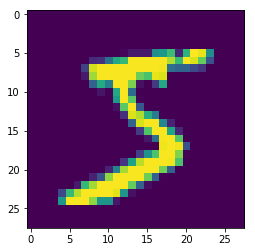

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build the model

In [17]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(23, 3, 3, input_shape=(28,28,1), use_bias=False))  # ChannelSize=26, RF=3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(40, 3, 3, input_shape=(28,28,1), use_bias=False))  # ChannelSize=24, RF=5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(20, 1, activation='relu'))  #ChannelSize=24, RF=5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # ChannelSize=12, RF=10


model.add(Convolution2D(40, 3, 3, activation='relu', use_bias=False))  # ChannelSize=10, RF=12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, activation='relu', use_bias=False))  #ChannelSize=10, RF=14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # ChannelSize=5, RF=28


model.add(Convolution2D(10, 5, use_bias=False))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu", use_bias=False)`


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 23)        207       
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 23)        92        
_________________________________________________________________
activation_34 (Activation)   (None, 26, 26, 23)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 40)        8280      
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 24, 40)        160       
_________________________________________________________________
activation_35 (Activation)   (None, 24, 24, 40)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 20)        820       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Train the model and take the best model as the validation accuracy fluctuates with every epoch

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install -q h5py pyyaml
from keras.models import model_from_json

In [31]:
!ls "/content/gdrive/My Drive/EVA"

S3  S3V2


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/S3V2/epochs:{epoch:03d}-val_acc:{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')


In [0]:
callbacks_list = [checkpoint]

In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, validation_data=(X_test, Y_test), callbacks=callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.3821 - acc: 0.9363 - val_loss: 0.1168 - val_acc: 0.9863

Epoch 00001: val_acc improved from -inf to 0.98630, saving model to /content/gdrive/My Drive/EVA/S3V2/epochs:001-val_acc:0.9863.hdf5
Epoch 2/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.1532 - acc: 0.9708 - val_loss: 0.0642 - val_acc: 0.9898

Epoch 00002: val_acc improved from 0.98630 to 0.98980, saving model to /content/gdrive/My Drive/EVA/S3V2/epochs:002-val_acc:0.9898.hdf5
Epoch 3/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.1050 - acc: 0.9771 - val_loss: 0.0533 - val_acc: 0.9896

Epoch 00003: val_acc did not improve from 0.98980
Epoch 4/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.0838 - acc: 0.9811 - val_loss: 0.0370 - val_acc: 0.9911

Epoch 00004: val_acc improved from 0.98980 to 0.99110, saving model to 

In [35]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, validation_data=(X_test, Y_test), callbacks=callbacks_list, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
  608/60000 [..............................] - ETA: 17s - loss: 0.0104 - acc: 0.9967

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 278us/step - loss: 0.0199 - acc: 0.9948 - val_loss: 0.0237 - val_acc: 0.9925

Epoch 00001: val_acc did not improve from 0.99340
Epoch 2/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.0189 - acc: 0.9949 - val_loss: 0.0233 - val_acc: 0.9929

Epoch 00002: val_acc did not improve from 0.99340
Epoch 3/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.0168 - acc: 0.9956 - val_loss: 0.0274 - val_acc: 0.9915

Epoch 00003: val_acc did not improve from 0.99340
Epoch 4/50
60000/60000 [==============================] - 18s 293us/step - loss: 0.0170 - acc: 0.9955 - val_loss: 0.0261 - val_acc: 0.9921

Epoch 00004: val_acc did not improve from 0.99340
Epoch 5/50
60000/60000 [==============================] - 17s 278us/step - loss: 0.0170 - acc: 0.9955 - val_loss: 0.0204 - val_acc: 0.9932

Epoch 00005: val_acc did not improve from 0.99340
Epoch 6/50
60000/60000 [==============================] - 17s

In [0]:
adam = keras.optimizers.Adam()
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

lr_metric = get_lr_metric(adam)

In [0]:
from keras.models import load_model

modelPath = r'/content/gdrive/My Drive/EVA/S3V2/epochs:028-val_acc:0.9940.hdf5'
model = load_model(modelPath, custom_objects={'lr':lr_metric})

### Evaluate the model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.019787834308715536, 0.9946]


In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[1.81725667e-07 1.58549381e-06 5.64555364e-07 8.16708621e-08
  1.36709662e-06 4.81831961e-08 7.88918624e-06 9.99988198e-01
  1.34838951e-09 1.10078489e-07]
 [4.06789150e-05 2.55228679e-05 9.99918580e-01 1.58213240e-07
  4.66819188e-08 1.17109333e-09 2.48312449e-06 6.09049437e-07
  9.78476322e-09 1.20505856e-05]
 [3.60907802e-06 9.99981403e-01 1.18491414e-06 4.34050889e-07
  2.30980072e-06 4.22877292e-06 2.23643315e-06 4.08121650e-06
  1.01179225e-07 3.31977020e-07]
 [9.99872923e-01 5.99545592e-06 1.85917415e-07 1.08889899e-05
  1.06397074e-05 1.26344848e-05 8.80411426e-06 3.00818683e-05
  4.72187567e-05 5.46360980e-07]
 [8.05552077e-07 3.98691668e-07 4.41553247e-08 2.39804422e-07
  9.99998450e-01 2.32078996e-08 2.59033222e-08 3.27793437e-09
  7.47517319e-08 1.52910822e-08]
 [2.64481901e-06 9.99956131e-01 1.24357130e-05 3.34053567e-07
  5.73517946e-06 1.54867928e-06 5.21846550e-06 1.40789762e-05
  2.23680019e-07 1.72215266e-06]
 [8.81455395e-11 5.03499268e-06 1.95510961e-06 1.95707561e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

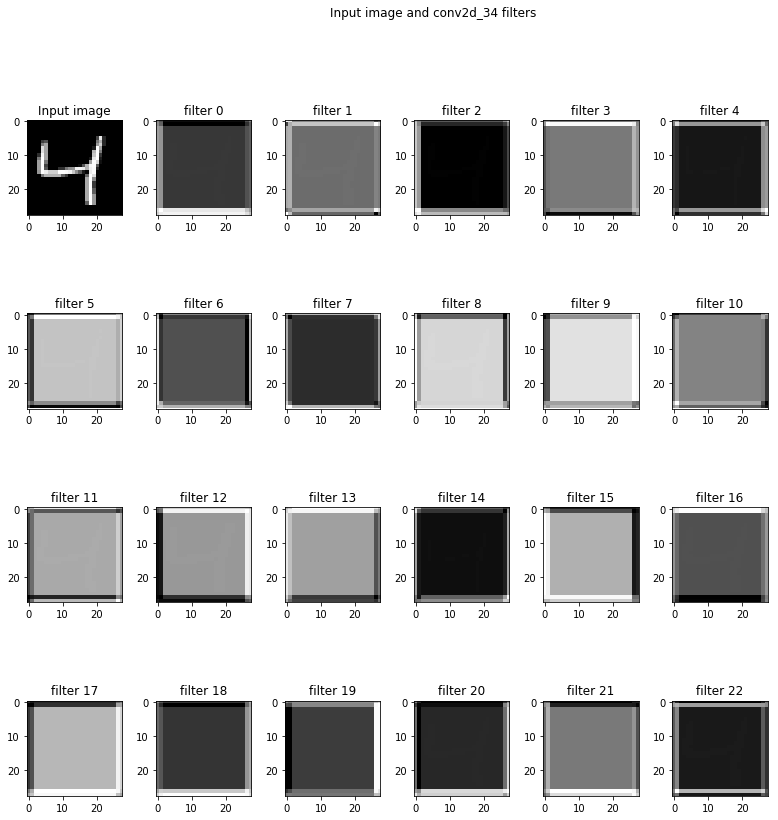

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_34'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()